In [ ]:
############################# - Notes for use to avoid confusion :)


#Not all cells work together. For example if you run the cell that deals with missing values by removing the entire row
#or removing all columns you will not be able to use the method to predict null values because the entries will be gone.

#So in order to predict the missing values after using the code cells that remove them you simply have to first run the code cell
#which reads the original data again

#Websites:
    #preporcessing methods outline - https://blog.ml.cmu.edu/2020/08/31/2-data-exploration/
    #outliers simple - https://analyticsindiamag.com/how-to-detect-and-treat-outliers-in-categorical-data/
    #pca collinearity removal/heatmap - https://towardsdatascience.com/how-do-you-apply-pca-to-logistic-regression-to-remove-multicollinearity-10b7f8e89f9b#:~:text=PCA%20in%20action%20to%20remove%20multicollinearity&text=PCA%20(Principal%20Component%20Analysis)%20takes,effectively%20eliminate%20multicollinearity%20between%20features.
    #vif - https://towardsdatascience.com/how-to-remove-multicollinearity-using-python-4da8d9d8abb2
    #pca 2D - https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51
    #pca 3D - https://drzinph.com/pca-visualized-with-3d-scatter-plots/
    #tsne -https://builtin.com/data-science/tsne-python
    #umap - https://blog.ml.cmu.edu/2020/08/31/2-data-exploration/
    #automatic outlier detection - https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
    #3D tsne and umap -  https://plotly.com/python/t-sne-and-umap-projections/#project-data-into-3d-with-tsne-and-pxscatter3d
#############################

In [ ]:
#missing values have value ? all for attribute 11

#either edible, poisonous or unknown. Unknowm and poisonous grouped together

#to deal with missing values use 'classifier' or 'regressor' based on values that arent missing to predict missing values in
#preprocessing. Be careful that vlaues using to predict arent overfitted. Compare to other methods such as removing entire attribute
#or giving deafult/mean value

from sklearn import metrics
from sklearn import model_selection
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import umap.umap_ as umap

from statsmodels.stats.outliers_influence import variance_inflation_factor

import plotly.express as px

In [183]:
# read contents of data file
file = pd.read_csv("agaricus-lepiota.data", header = None)

# create list to be used as headers
features = ['edibility', 'capShape', 'capSurface', 'capColor', 'bruises', 'odor', 
            'gillAttachment', 'gillSpacing', 'gillSize', 'gillColor', 
            'stalkShape', 'stalkRoot', 'stalkSurfaceAboveRing', 'stalkSurfaceBelowRing', 
            'stalkColorAboveRing', 'stalkColorBelowRing', 'veilType', 'veilColor', 
            'ringNumber', 'ringType', 'sporePrintColor', 'population', 'habitat']

#convert '?' to NaN
file.replace({'?': np.nan}, inplace=True)

# converting data frame to csv
file.to_csv("agaricus-lepiota.csv", header=features, index=False)

data = pd.read_csv("agaricus-lepiota.csv")

#we can drop veilType as all entries are the same so cannot be used to predict
print(data.nunique())
data = data.drop('veilType', axis = 1).reset_index(drop=True)
features.remove('veilType')

#result = data.head(10)
#print(data)
#print(result)

edibility                 2
capShape                  6
capSurface                4
capColor                 10
bruises                   2
odor                      9
gillAttachment            2
gillSpacing               2
gillSize                  2
gillColor                12
stalkShape                2
stalkRoot                 4
stalkSurfaceAboveRing     4
stalkSurfaceBelowRing     4
stalkColorAboveRing       9
stalkColorBelowRing       9
veilType                  1
veilColor                 4
ringNumber                3
ringType                  5
sporePrintColor           9
population                6
habitat                   7
dtype: int64


In [ ]:
#removes column with missing values which in our data is only stalkRoot
#one way to deal with missing values
print(data.shape)

data = data.drop('stalkRoot', axis = 1).reset_index(drop=True)

print(data.shape)

data.to_csv("agaricus-lepiota-no-stalkRoot.csv")

print(data.head(10))

In [ ]:
#removes all rows that have missing values
print(data.shape)

data = data.dropna(axis = 0).reset_index(drop=True)
 
#shows we lose alot of data as 2480 rows lost
#bad way of handling missing values
print(data.shape)

data.to_csv("agaricus-lepiota-NaN-removed.csv")

In [211]:
#use label encoding on all features that are categorical
#OneHot encoding not applicable as there are a high number of categories
le = LabelEncoder()

data['edibility'] = le.fit_transform(data['edibility'])
data['capShape'] = le.fit_transform(data['capShape'])
data['capSurface'] = le.fit_transform(data['capSurface'])
data['capColor'] = le.fit_transform(data['capColor'])
data['bruises'] = le.fit_transform(data['bruises'])
data['odor'] = le.fit_transform(data['odor'])
data['gillAttachment'] = le.fit_transform(data['gillAttachment'])
data['gillSpacing'] = le.fit_transform(data['gillSpacing'])
data['gillSize'] = le.fit_transform(data['gillSize'])
data['gillColor'] = le.fit_transform(data['gillColor'])
data['stalkShape'] = le.fit_transform(data['stalkShape'])
data['stalkRoot'] = le.fit_transform(data['stalkRoot'])
data['stalkSurfaceAboveRing'] = le.fit_transform(data['stalkSurfaceAboveRing'])
data['stalkSurfaceBelowRing'] = le.fit_transform(data['stalkSurfaceBelowRing'])
data['stalkColorAboveRing'] = le.fit_transform(data['stalkColorAboveRing'])
data['stalkColorBelowRing'] = le.fit_transform(data['stalkColorBelowRing'])
data['veilColor'] = le.fit_transform(data['veilColor'])
data['ringNumber'] = le.fit_transform(data['ringNumber'])
data['ringType'] = le.fit_transform(data['ringType'])
data['sporePrintColor'] = le.fit_transform(data['sporePrintColor'])
data['population'] = le.fit_transform(data['population'])
data['habitat'] = le.fit_transform(data['habitat'])

#print(data['veilColor'].value_counts())

#print(data.edibility.nunique())


data.to_csv("agaricus-lepiota-encoded.csv")

AttributeError: 'DataFrame' object has no attribute 'feature'

In [180]:
#predict missing values for stalkRoot
NaN_predict = data.drop('edibility', axis = 1).reset_index(drop=True)

NaN_train_data = NaN_predict[NaN_predict['stalkRoot']!= 4].copy()
NaN_test_data = NaN_predict[NaN_predict['stalkRoot'] == 4].copy()

NaN_X_train = NaN_train_data.drop('stalkRoot', axis = 1).reset_index(drop=True)
NaN_y_train = NaN_train_data['stalkRoot']

NaN_X_test = NaN_test_data.drop('stalkRoot', axis = 1).reset_index(drop=True)

###############################################################################################################################
#This code further breaks the data down into training and test sets comprising of rows that have no missing values
#Allows us to run models and check how accurately they can predict the missing values then choose an appropriate one
#In this case both Random Forest and Support Vector Classification predict that exact same values for 'stalkRoot' so either can be used
#Both have 100% accuracy in predicitng 'stalkRoot' so we know when we predict the missing values they will most likely be correct.
X_train, X_test, y_train, y_test = train_test_split(NaN_train_data, NaN_train_data['stalkRoot'], test_size=0.2,random_state=42)

rfr = RandomForestRegressor()
svm = SVC()

rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

rfr_rounded = (np.rint(rfr_pred)).astype(int)

svm_rounded = (np.rint(svm_pred)).astype(int)

different = []

for i in range(len(rfr_rounded)):
    if rfr_rounded[i] != svm_rounded[i]:
        different.append(rfr_rounded[i], svm_rounded[i])

print(len(different))

print(classification_report(y_test,rfr_rounded))

print(classification_report(y_test,svm_rounded))
##############################################################################################################################

rfc = RandomForestRegressor()

rfc.fit(NaN_X_train,NaN_y_train)
y_pred = rfc.predict(NaN_X_test)

rounded_data = (np.rint(y_pred)).astype(int)
NaN_test_data['stalkRoot'] = rounded_data

NaN_test_data.to_csv("predicted-missing-values.csv")

frames = [NaN_train_data, NaN_test_data]
treated_data = pd.concat(frames)
treated_data.insert(0, column = 'edibility', value = data['edibility'])

X = treated_data.drop('edibility', axis = 1).reset_index(drop=True)
y = treated_data['edibility']

data_scaled = StandardScaler().fit_transform(X)

treated_data.to_csv("full-data.csv")

0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       665
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       207

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       665
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       207

    accuracy                           1.00       981
   macro avg       1.00      1.00      1.00       981
weighted avg       1.00      1.00      1.00       981



(8124, 22)
(6920, 22)


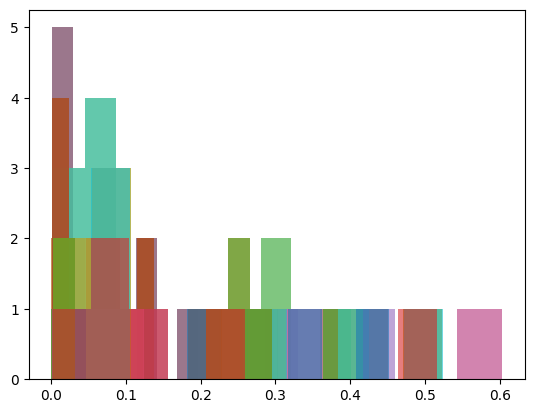

In [179]:
# define outliers as values a category can take which is significantly more or less frequent than the others
# this cell is purely exploratory and does not record the outliers themselves, only which categories contain them
# only need to run this for visualisation, can skip and just run below cell to remove outliers

threshold = 0.03 # decides relative frequency threshold, below which values are considered outliers
contains_outliers = []
num_values = data.nunique()

print(data.shape)

# loop through categories and identify which contain outliers according to the above definitions
for i in range(len(features)):
    if num_values[i] > 2:
        value_frequencies = data[features[i]].value_counts(normalize=True) # normalize parameter converts values to relative frequency


        for j in range(len(value_frequencies)):
            if value_frequencies.iloc[j] < threshold:
                data = data[data[features[i]] != value_frequencies.index[j]]
                contains_outliers.append(value_frequencies)

                #removed break so all values less than threshold get removed
                #break

#print(contains_outliers)

print(data.shape)

# now display histogram
for x in range(len(contains_outliers)):
    plt.hist(contains_outliers[x], alpha = 0.6)

In [ ]:
# deletion method: remove all rows containing outliers

total_entries = len(data)
total_features = len(features)
removed_entries = []
total_removed_entries = 0
num_values = data.nunique()
contains_outliers = []
features_num = 0 # start category

threshold = 0.005 # define what relative frequency is the threshold to be considered an outlier

print(data.shape)

# loop through data and remove rows as outliers are detected
for i in range(total_features):
    if num_values[i] > 2: # features with 2 possible values cannot have outliers
        value_frequencies = data[features[i]].value_counts(normalize=True) # relative frequencies of each value in a feature
        outlier_values = []

        # make list of which values are outliers
        for j in range(len(value_frequencies)):
            if value_frequencies.iloc[j] < threshold:
                contains_outliers.append(value_frequencies)
                outlier_values.append(j)
        
        print(contains_outliers)
        
        # if an entry contains an outlier value, remove it
        entry_num = 0
        while entry_num < (len(data) - 1):
            for x in range(len(outlier_values)):
                if data.at[entry_num, features[i]] == outlier_values[x]:
                    removed_entries.append(data.loc[entry_num])
                    data = data.drop(index=entry_num).reset_index(drop=True)
                    total_removed_entries += 1
                    break
            entry_num += 1

print(data.shape)

#print(total_removed_entries,"removed out of",total_entries,"total entries.")
#print(removed_entries)
        

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                  feature        VIF
0                capShape   1.030839
1              capSurface   1.268420
2                capColor   1.771424
3                 bruises  21.660228
4                    odor   1.935595
5          gillAttachment   0.000000
6             gillSpacing   6.268690
7                gillSize   8.316796
8               gillColor   3.099888
9              stalkShape   5.216882
10              stalkRoot  10.275461
11  stalkSurfaceAboveRing   1.706998
12  stalkSurfaceBelowRing   1.706998
13    stalkColorAboveRing   1.811227
14    stalkColorBelowRing   1.832184
15              veilColor   0.000000
16             ringNumber  13.501832
17               ringType  35.258600
18        sporePrintColor  15.087217
19             population   3.324073
20                habitat   1.449412


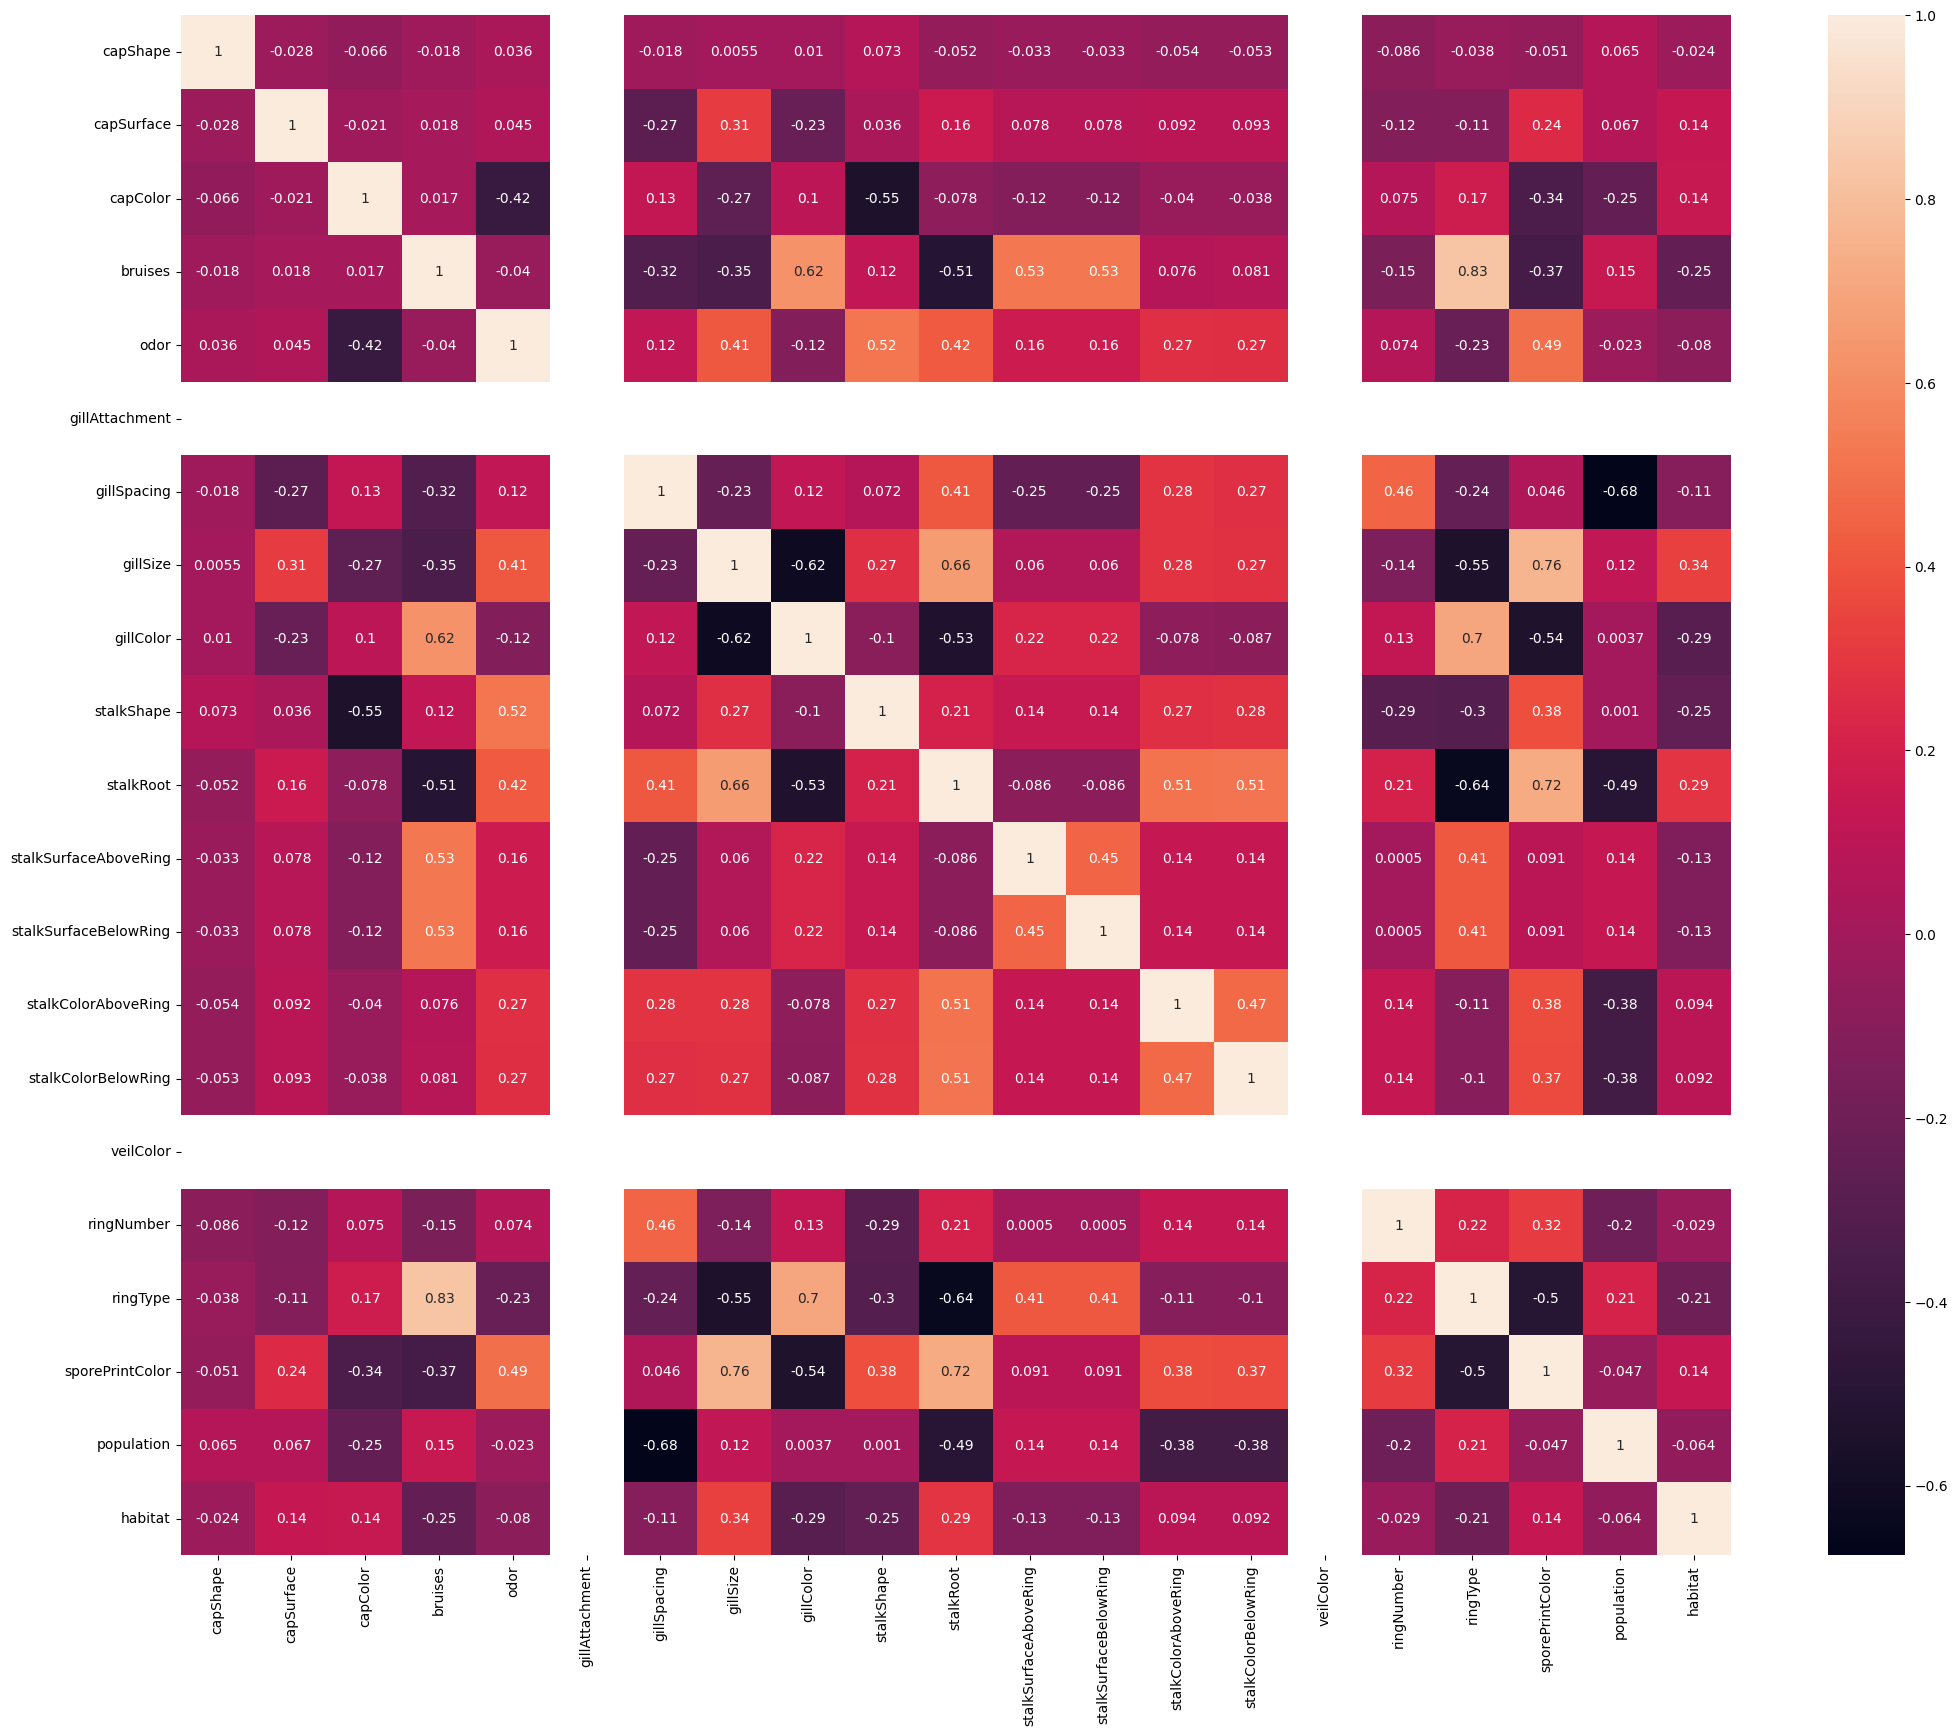

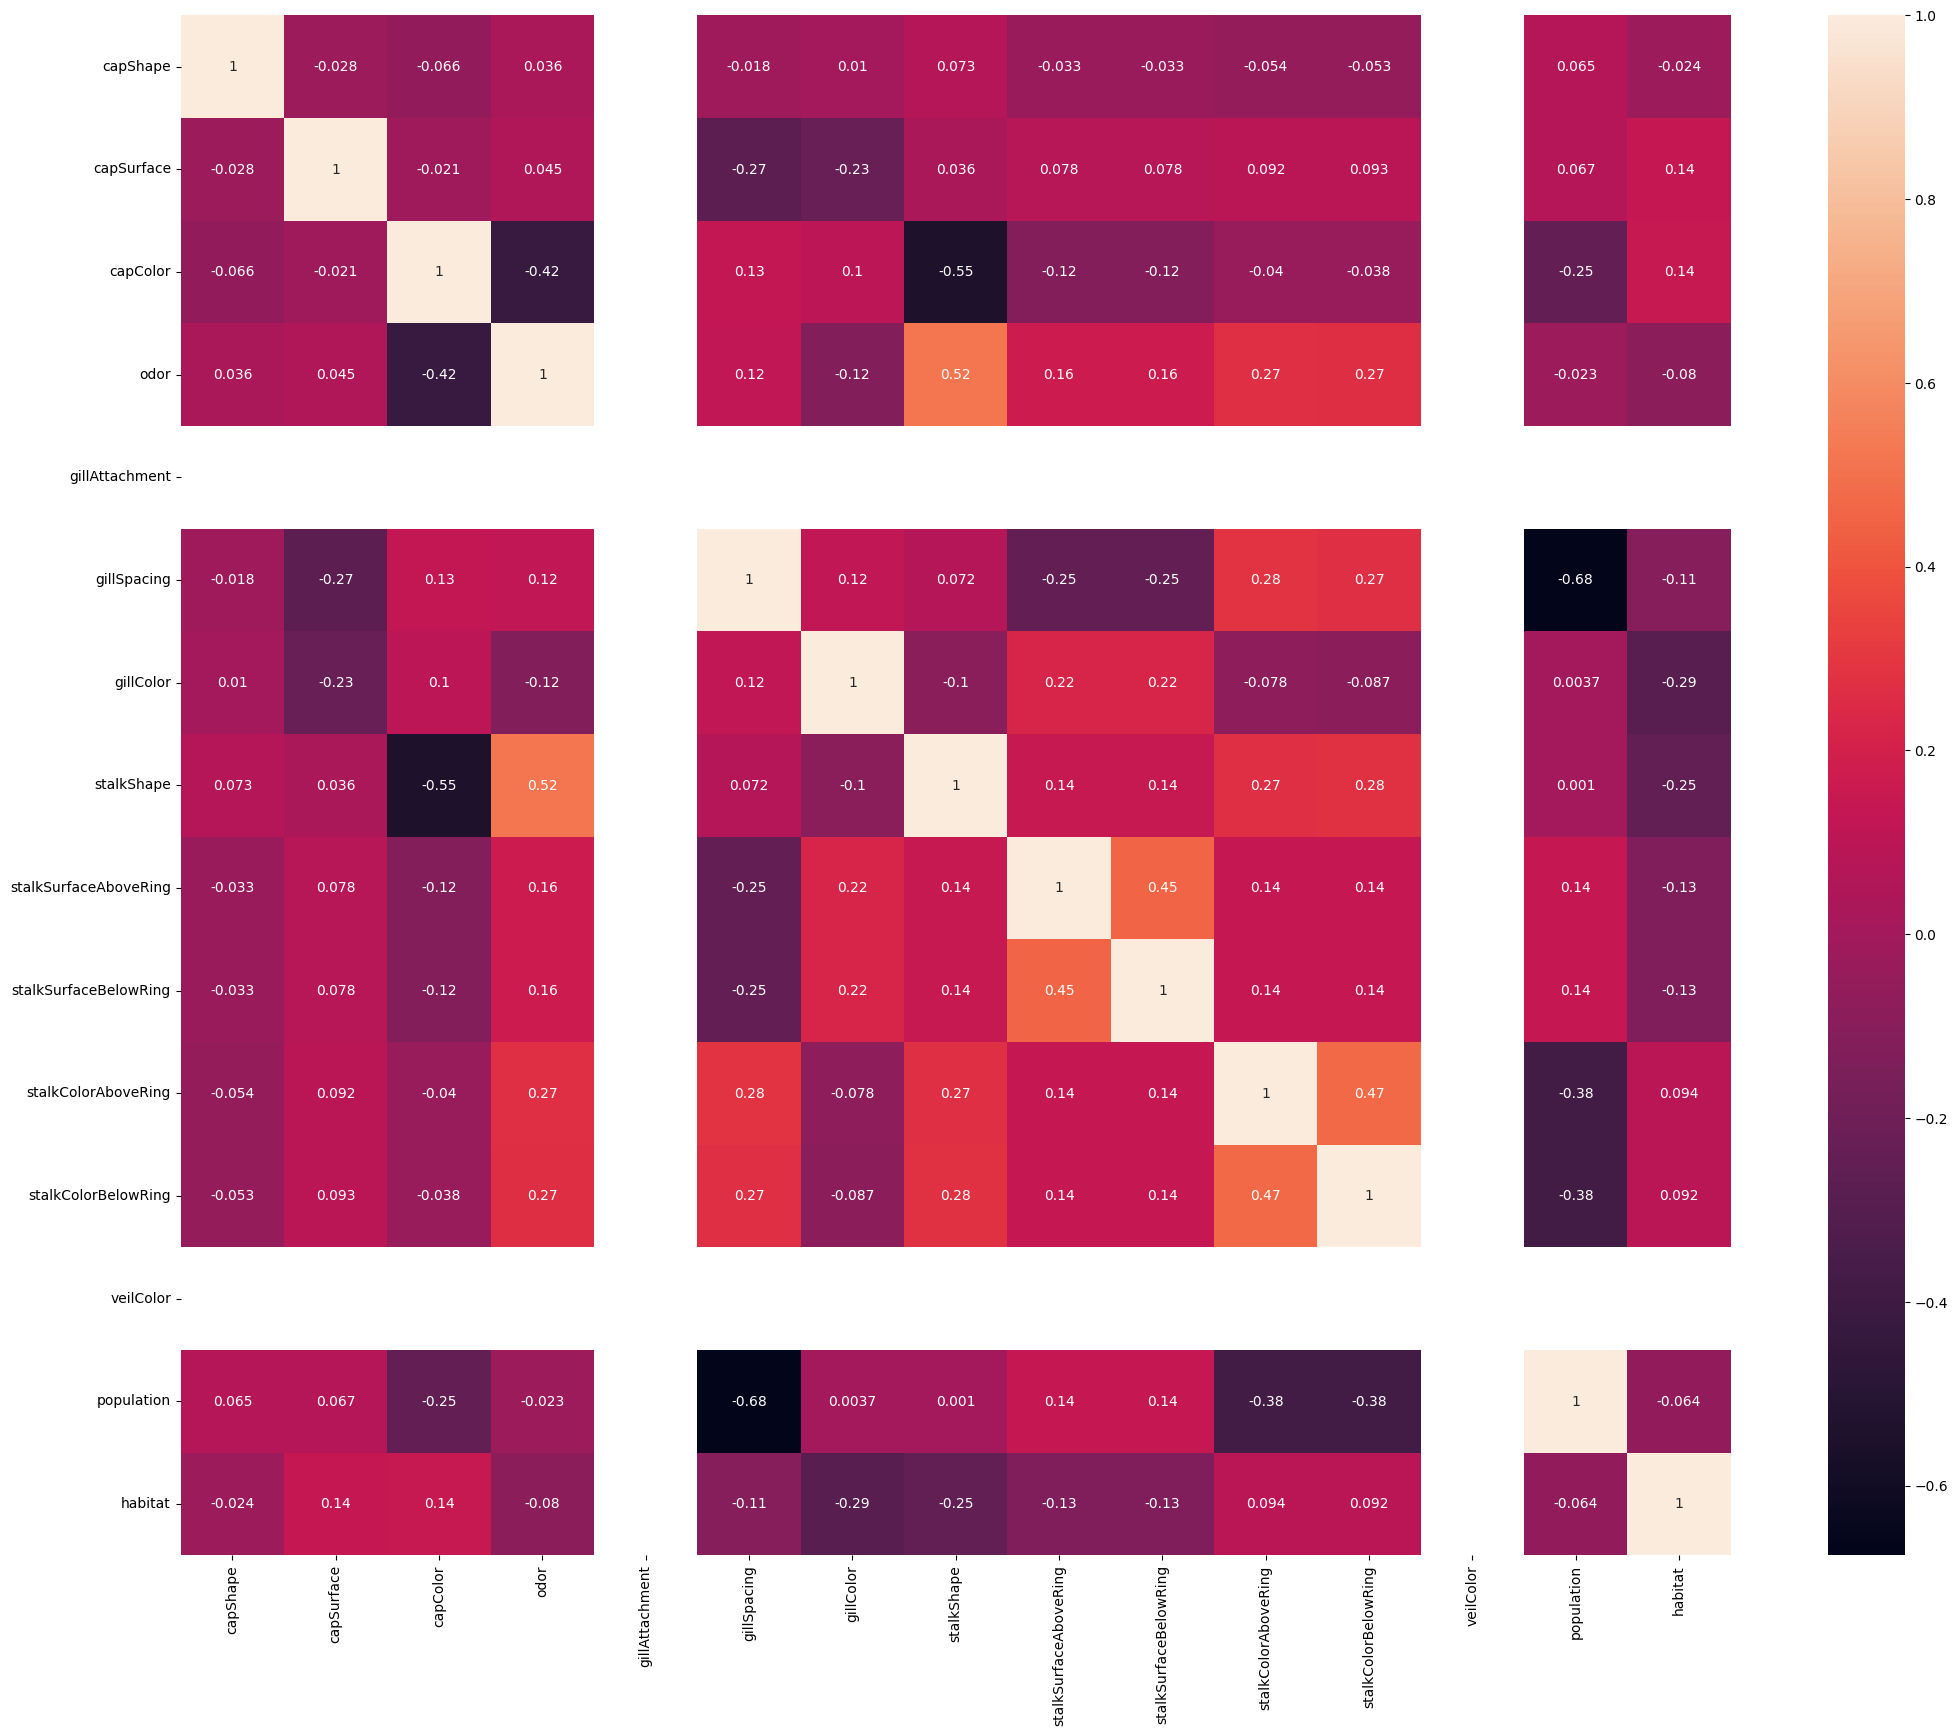

In [181]:
#variance inflation factor

fig = plt.figure(figsize=(25, 20))
sns.heatmap(X.corr(), annot=True)
plt.savefig("Heatmap.png")

#as you can see from heatmap there are some fearutes with high correlation

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

print(vif_data)

features_to_drop = []

for i in range(len(X.columns)):
	if vif_data["VIF"][i] > 7:
		drop = vif_data["VIF"][i]
		features_to_drop.append(vif_data["feature"][i])
	
uncorrelated_X = X.drop(features_to_drop, axis = 1).reset_index(drop=True)

uncorrelated_X_scaled = StandardScaler().fit_transform(uncorrelated_X)

#generally features with VIF > 5 get removed but we can experiment with slightly higher i.e > 7

fig2 = plt.figure(figsize=(25, 20))
sns.heatmap(uncorrelated_X.corr(), annot=True)
plt.savefig("Heatmap2.png")

#as seen by second heatmap these have much less colinearality

In [ ]:
#data visualisation pca
#a linear method so less complex than tsne thus takes much less time
#not very useful to visualise our dataset I dont think as shown by the explained variance and scree plot
pca = PCA(random_state=42)
pca_features = pca.fit_transform(data_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

#to be seen on a 2D-plot we can only use PC1 and PC2 which gives us the highest explained variance but still very low
#around 19% + 12% = 31% explained variance which is bad
plt.bar(x= range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.show()

pca_df = pd.DataFrame({'pca_1': pca_features[:,0], 'pca_2': pca_features[:,1], 'label': treated_data['edibility']})
print(pca_df)

sns.scatterplot(x = 'pca_1', y = 'pca_2', hue = 'label', data = pca_df)

plt.show()

#PCA could be useful to reduce multicolinearality though instead of data visualisation
#use the first 8 pc's to get about ~90% explained variance, 9 to get ~93%, 10 to get ~95%

In [ ]:
#PCA 3D
pca = PCA(n_components = 3, random_state=42)
pca_features = pca.fit_transform(data_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

pca_df = pd.DataFrame({'pca_1': pca_features[:,0], 'pca_2': pca_features[:,1], 'pca_3': pca_features[:,2], 'label': treated_data['edibility']})

edible = pca_df[pca_df['label'] == 0]
poisonous = pca_df[pca_df['label'] == 1]

colors=['b', 'r'] 

fig = plt.figure(1)

ax = fig.add_subplot(111, projection='3d')


p1 = ax.plot(edible['pca_1'], 
             edible['pca_2'], 
             edible['pca_3'], 
             'o', color=colors[0],                                 
             alpha = 0.6, label='edible',                           
             markersize=3, 
             markeredgecolor='black',
             markeredgewidth=0.1)

p2 = ax.plot(poisonous['pca_1'], 
             poisonous['pca_2'], 
             poisonous['pca_3'], 
             'o', color=colors[1],                                 
             alpha = 0.6, label='poisonous',                           
             markersize=3, 
             markeredgecolor='black',
             markeredgewidth=0.1)

ax.set_xlabel('PCA-1, ' +  str(round(pca.explained_variance_ratio_[0]*100,2)) + '% Explained', fontsize=7)
ax.set_ylabel('PCA-2, ' +  str(round(pca.explained_variance_ratio_[1]*100,2)) + '% Explained', fontsize=7)
ax.set_zlabel('PCA-3, ' +  str(round(pca.explained_variance_ratio_[2]*100,2)) + '% Explained', fontsize=7)
#z label wont work not sure why its 10.7% explained

fig.legend(fontsize = 'x-small', loc='upper center', markerscale=2)
plt.autoscale()
plt.rcParams["figure.dpi"] = 1000                            
plt.show()

In [ ]:
#data visualisation t-sne 2D
#unlike pca its not linear so much more complex and better for our data I think
#result of t-sne greatly affected by 'perplexity' hyperparameter
#try perplexity values in the range 5-100 default is 30. Higher perplexity takes longer but may be better
n_components = 2
tsne = TSNE(n_components, perplexity=50)
tsne_features = tsne.fit_transform(data_scaled)

tsne_df = pd.DataFrame({'tsne_1': tsne_features[:,0], 'tsne_2': tsne_features[:,1], 'label': treated_data['edibility']})

sns.scatterplot(x = 'tsne_1', y = 'tsne_2', hue = 'label', data = tsne_df)

plt.show()

In [ ]:
#3D tsne using plotly
n_components = 3
tsne = TSNE(n_components, perplexity=50, random_state=42)
tsne_features = tsne.fit_transform(data_scaled)

treated_data["edibility"] = treated_data["edibility"].astype(str)

fig = px.scatter_3d(
    tsne_features, x=0, y=1, z=2,
    color=treated_data['edibility'], labels={'color': 'edibility'}
)
fig.update_traces(marker_size=8)
fig.show()

"""tsne = tsne = TSNE(n_components, perplexity=50, random_state = 42)
tsne_features = tsne.fit_transform(uncorrelated_X_scaled)

treated_data["edibility"] = treated_data["edibility"].astype(str)

fig = px.scatter_3d(
    tsne_features, x=0, y=1, z=2,
    color=treated_data['edibility'], labels={'color': 'edibility'}
)
fig.update_traces(marker_size=8)
fig.show()"""

treated_data["edibility"] = treated_data["edibility"].astype(int)

In [ ]:
#data visualisation UMAP
#UMAP works very similarly to tsne but get more efficient for higher volumes of data
#result greatly affected by n_neighbors and min_dist hyperparameters
#for n_neighbors try range 5-100 and min_dist 0.1-1
fit = umap.UMAP(
    n_neighbors=50,
    min_dist=0.25,
    n_components=2,
    metric = 'correlation',
    random_state = 42
)

umap_features = fit.fit_transform(data_scaled)

umap_df = pd.DataFrame({'umap_1': umap_features[:,0], 'umap_2': umap_features[:,1], 'label': treated_data['edibility']})

sns.scatterplot(x = 'umap_1', y = 'umap_2', hue = 'label', data = umap_df)

plt.show()

In [ ]:
#UMAP 3D using plotly
fit = umap.UMAP(
    n_neighbors=50,
    min_dist=0.25,
    n_components=3,
    metric = 'correlation',
    random_state = 42
)

umap_features = fit.fit_transform(data_scaled)

treated_data["edibility"] = treated_data["edibility"].astype(str)

fig_3d = px.scatter_3d(
    umap_features, x=0, y=1, z=2,
    color=treated_data['edibility'], labels={'color': 'edibility'}
)
fig_3d.update_traces(marker_size=5)

fig_3d.show()


"""fit = umap.UMAP(
    n_neighbors=50,
    min_dist=0.25,
    n_components=3,
    metric = 'correlation',
    random_state = 42
)

umap_features = fit.fit_transform(uncorrelated_X_scaled)

treated_data["edibility"] = treated_data["edibility"].astype(str)

fig_3d = px.scatter_3d(
    umap_features, x=0, y=1, z=2,
    color=treated_data['edibility'], labels={'color': 'edibility'}
)
fig_3d.update_traces(marker_size=5)

fig_3d.show()"""

treated_data["edibility"] = treated_data["edibility"].astype(int)